## Motvation

* I have a set of timestamps and values corresponding to the timestamps and want to predict in the future what will the values be based on these values (Extrapolation)
* I have a set of timestamps with a granularity lower than desired (some gaps) and want to fill the gaps in (Interpolation, most common use)

Some real world applications are:

* Time Series Analysis (Big in finance , since a lot of things in finance like stocks and indexes are time series)
* Speech Processing (Speech is A time series)
* Image processing (Filling in dead pixels)
* Weather forecasting 

## Linear Regression

The simple task of fitting a line on  a set of data points. lets say our  domain (day of the year) is $\mathbf{X}$ and our measurments which they map to (account balance) $\mathbf{y}$ , simple problem where our measurements are one dimensional (to simplify a solution we augment the domain with a column of 1s):

\begin{equation}
\mathbf{X}=
\begin{pmatrix}
1 &x_{1} \\
1&x_{2}  \\
\vdots \\
1&x_{n}
\end{pmatrix},
\mathbf{y}=
\begin{pmatrix}
y_{1} \\
y_{2}  \\
\vdots \\
y_{n}
\end{pmatrix}
\end{equation}


Then what linear regression tries to do is fit a line $y=mx + c$ that minimises some sort of error measured from the line to the real values ($\mathbf{y}$)  so we define the error as :

\begin{equation}
  E(m,c) = \sum_{i=1}^{n} ( y_{i} - (m*x_{i} + c ) )
\end{equation}

And to minimise the error we use basic calculus (if this does not make sense, just think of it as an procedure that finds the constants in the line $(m,c$ such that the error is 0 :

\begin{equation}
 \nabla_{m,c}E(m,c) = 0
\end{equation}

We solve this simultaneous equation for $m$ and $c$  obtaining the the line of best fit in terms of $\mathbf{x}$ and $\mathbf{y}$ :

\begin{equation}
\begin{pmatrix}
m \\
c
\end{pmatrix} = (\mathbf{X}^t \mathbf{X})^{-1} \mathbf{X}^{t} \mathbf{y}
\end{equation}

This equation is a one liner in numpy and generalises to when the data has many features (multidimensional)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generate_linear_data(n=100,noise=1):
    m, c = (1, 0) # gradient 1 , y-intercept 0
    f = lambda x: m*x + c 
    xx = np.random.uniform(-3,3, n)
    N = np.random.randn(n)
    yy = f(xx)  + noise*N
    return xx, yy

def generate_sinusoidal_data(n=100, noise=0.4):
    amp, freq = (2, 1) # gradient 1 , y-intercept 0
    f = lambda x: amp*np.sin(freq*x)  
    xx = np.random.uniform(-3,3, n)
    N = np.random.randn(n)
    yy = f(xx)  + noise*N
    return xx, yy
    
def linear_regression(X, y):
    # X^-1 stands for matrix inverse just like the inverse of a number 1/x = x^-1
    c, m = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return m, c


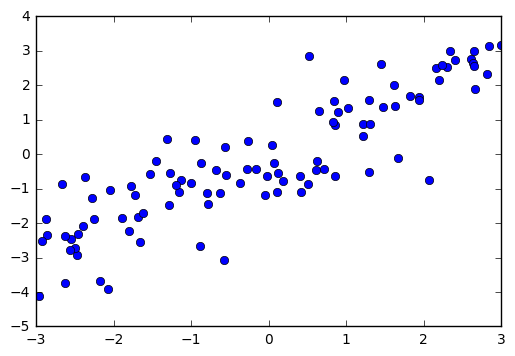

In [2]:
x,y = generate_linear_data()
plt.plot(x,y, "o")

In [3]:
X =np.array([[1,x1] for x1 in x])
m, c = linear_regression(X,y)

In [4]:
print("y-intercept: {c}, gradeint: {m}".format(m=m,c=c))

y-intercept: -0.08307665039375109, gradeint: 0.9243356681014886


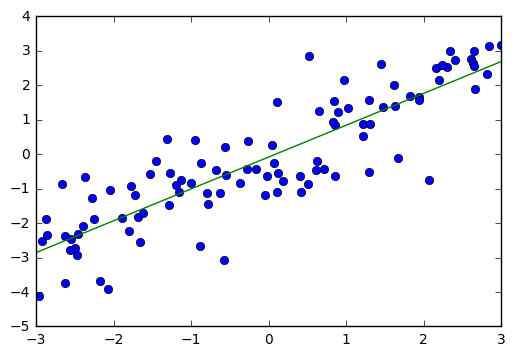

In [5]:
xx = np.arange(-3,3, 0.01)
yy = m*xx + c
plt.plot(x,y, "o")
plt.plot(xx,yy)

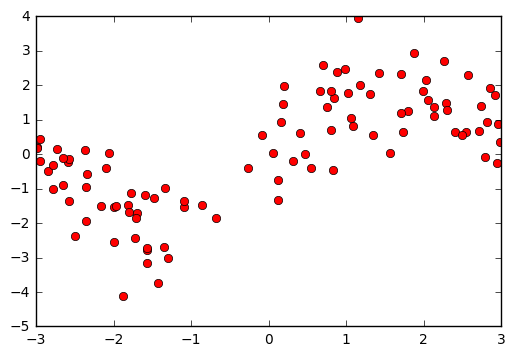

In [8]:
x,y = generate_sinusoidal_data(noise=1)

plt.plot(x,y, "ro")

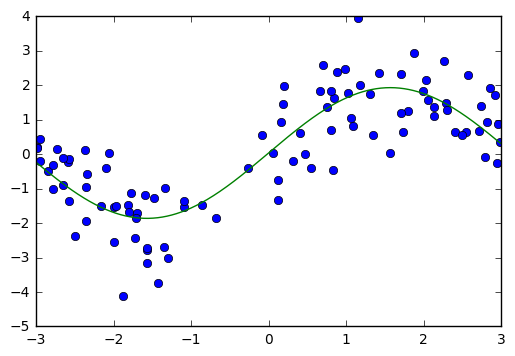

In [9]:
xt = np.sin(x)
X =np.array([[1,x1] for x1 in xt])
m, c = linear_regression(X,y)
xx =(np.arange(-3,3, 0.01))
yy = m*np.sin(xx) +c 
plt.plot(x,y, "o")
plt.plot(xx,yy)

In [ ]:
m,c